# Validation notebook

This is a notebook to validate the functions

In [1]:
import numpy as np
import cv2
import img_functions as imf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# load image

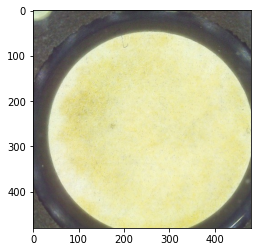

In [2]:
image = cv2.imread('../data/ebc53.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

# Masking method

In [3]:
path_to_dir = r'../data/masked'
img_masked = imf.masking_function(image, image, path_to_dir)

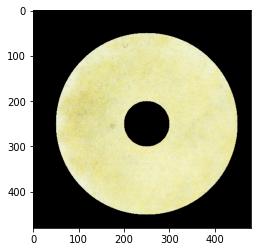

In [4]:
plt.imshow(img_masked)
plt.show()

# Compression by PCA

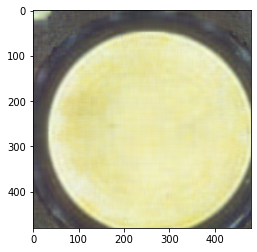

In [5]:
#this part demonstrates that the higher the number of components, the less compression
img_compressed = imf.compress_img(image,20)
plt.imshow(img_compressed)
plt.show()    

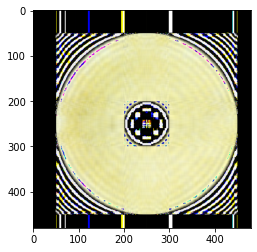

In [6]:
#in the generate results part we used first the mask, then the compression.
#as can be seen this generates odd results -> should add a mask afterwards!
img_compressed = imf.compress_img(img_masked,20)
plt.imshow(img_compressed)
plt.show()   

# Get color by random extraction method

In [7]:
random_color = imf.random_list(img_masked) 
arr = np.array(random_color).reshape(len(random_color),1,3)
# to get average of RGB numbers withouth black colors 
red, green, blue = imf.get_average_color(arr)
print(red, green, blue)

233 232 172


In [8]:
def visualize_rbg(red, green, blue):
    """
    function  to create a 5x5 rectangular image with 
    a solid color specified by the values of red, green, and blue. 
    """
    n = 5 
    color = [red, green, blue]
    rect = np.zeros((n, n, 3), dtype=np.uint8)
    cv2.rectangle(rect, (int(0), 0), (int(n), n), color, -1)
    return rect

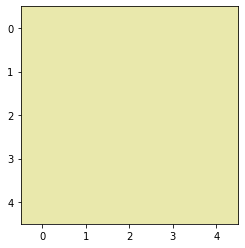

In [9]:
plt.imshow(visualize_rbg(red, green, blue))
plt.show() 

# Color extraction by most dominant color method

In [10]:
image = cv2.imread('../data/ebc53.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

reshape = image.reshape((image.shape[0] * image.shape[1], 3))
cluster = KMeans(n_clusters=5, random_state = 42).fit(reshape)
red, green, blue = imf.get_dominant_color(cluster, cluster.cluster_centers_, False)
print(f'most dominant color \n{red} {green} {blue}') 


most dominant color 
236 236 183


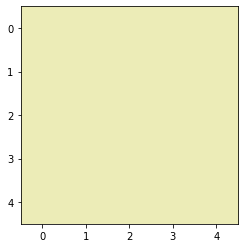

In [11]:
plt.imshow(visualize_rbg(red, green, blue))
plt.show()

In [12]:
rect = imf.visualize_colors(cluster, cluster.cluster_centers_)

[134.43203704 136.55944444 111.56611111] 2.36%
[93.90415745 92.13213773 86.29676643] 11.22%
[75.24898693 72.51355953 73.86982376] 18.04%
[228.32796267 225.81306193 157.50768205] 26.70%
[236.18871776 235.70377081 182.51542795] 41.68%


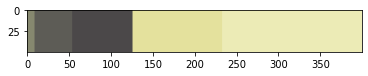

In [13]:
plt.imshow(rect)
plt.show()

# Add a mask

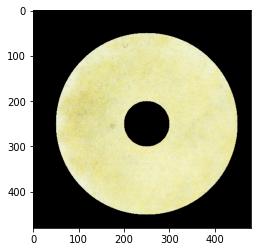

In [14]:
image = cv2.imread('../data/ebc53.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

path_to_dir = r'../data/masked'
img_masked = imf.masking_function(image, image, path_to_dir)

plt.imshow(img_masked)
plt.show()

In [15]:
reshape = img_masked.reshape((img_masked.shape[0] * img_masked.shape[1], 3))
cluster = KMeans(n_clusters=5, random_state = 42).fit(reshape)
#make sure to set bool masked = true on true
red, green, blue = imf.get_dominant_color(cluster, cluster.cluster_centers_, True)
print(f'most dominant color \n{red} {green} {blue}') 

most dominant color 
236 235 176


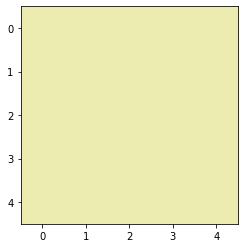

In [16]:
#this is the most dominant color
plt.imshow(visualize_rbg(red, green, blue))
plt.show()

[220.76145691 216.79044118 142.36593707] 4.82%
[238.47135722 238.77798046 191.60330076] 9.72%
[231.34404537 228.87168471 162.13742338] 15.19%
[236.05300214 234.56985607 175.73042015] 21.39%
[-2.27657893e-11  1.89999128e-11  2.00373051e-12] 48.88%


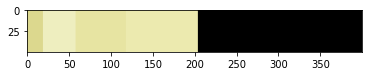

In [17]:
# these are the cluster colors
rect = imf.visualize_colors(cluster, cluster.cluster_centers_)
plt.imshow(rect)
plt.show()